## 初期設定

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import pickle
import random

from visualize import visualization
myvs = visualization()
from select_datasets import Select_datasets as my_SD
myds = my_SD("/data7/ALL/db/ns/8k")
from sklearn.preprocessing import StandardScaler


#sample_data

path="/data6/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

min_freq = 0.1
max_freq = 400

start = math.ceil(min_freq/f_resolution)-1
stop = math.ceil(max_freq/f_resolution)-1

x = np.arange(start+1,stop+1)*f_resolution
D_df_limfreq = D_df.iloc[:,start:stop]


## get datasets

In [2]:
df_imamura_abnormal_data = myds.concat_npz(glob.glob("/home/kashiwazaki/Bthesis/edata_/edata/**.npz"))
df_ImamuraAbnormal_pre = df_imamura_abnormal_data.iloc[:,start:stop]
df_ImamuraAbnormal_pre

0           1           2           3           4           5    \
0     2659.198621  393.325415  454.642862  250.441237  233.678012  272.528985   
1     2431.311344  354.902017  409.156847  229.841866  235.572640  265.035149   
2     2638.853545  400.680499  440.336101  348.278691  331.823008  337.998418   
3     2540.309984  397.117338  415.029425  247.074044  286.974103  302.569158   
4     2566.477486  398.898264  391.118480  300.232387  293.232228  332.539906   
...           ...         ...         ...         ...         ...         ...   
1435   355.217192  156.399793  166.019671  198.384994  225.776400  252.953558   
1436   371.715936  153.365039  150.408107  196.258235  213.059565  241.756654   
1437   339.493341  172.065658  159.476038  184.333826  192.349654  251.711225   
1438   291.075822  151.676753  174.019234  180.799240  184.088673  226.376313   
1439   357.759634  151.694597  152.637684  192.016122  192.844064  259.057854   

             6           7           8           9    ...         252  \
0     293.880414  342.573205  425.434550  359.777974  ...  527.015441   
1     280.273539  287.032880  344.686973  390.559601  ...  657.387581   
2     346.077760  344.394115  431.331192  415.428903  ...  579.845709   
3     296.226159  309.196664  351.411071  463.934495  ...  614.171559   
4     371.549184  338.718384  384.407480  441.654889  ...  545.385980   
...          ...         ...         ...         ...  ...         ...   
1435  247.176909  375.444268  514.476939  365.125588  ...  566.878952   
1436  267.752230  318.121015  489.978479  399.870585  ...  548.183512   
1437  275.325876  346.019341  485.400973  355.564324  ...  585.370690   
1438  292.429978  317.118807  460.521005  362.636398  ...  594.420446   
1439  273.008020  319.235240  495.596096  378.716803  ...  562.185464   

             253         254         255         256         257         258  \
0     521.910806  564.558497  566.571556  650.762127  607.437534  546.998628   
1     549.448415  513.697915  555.560215  608.625765  574.175789  588.523898   
2     565.377236  471.485967  587.302739  577.603850  607.117386  539.095967   
3     530.049100  605.651282  593.503899  480.322189  570.295885  595.703425   
4     500.705453  579.729638  529.849471  549.735027  532.182222  502.503837   
...          ...         ...         ...         ...         ...         ...   
1435  615.428940  536.993496  619.065601  572.555419  550.982256  604.678577   
1436  613.978505  633.565723  624.532991  500.378263  545.923901  576.698857   
1437  592.977456  537.852943  564.193527  506.592656  538.986335  631.813060   
1438  566.191055  583.175991  582.232090  507.000760  451.609194  561.866751   
1439  533.685312  633.380612  505.183689  622.764235  492.910111  633.315940   

             259         260         261  
0     578.867737  624.791811  558.030378  
1     555.692123  534.614769  574.088682  
2     657.801318  541.437824  611.963983  
3     477.582883  559.419954  645.582810  
4     555.054418  577.819003  597.277680  
...          ...         ...         ...  
1435  607.688011  474.209352  572.210552  
1436  537.656098  569.138377  565.046835  
1437  577.000889  572.599777  584.777962  
1438  556.554693  552.587848  582.518347  
1439  542.249298  612.497866  585.232062  

[1440 rows x 262 columns]

In [ ]:
fig,ax = plt.subplots()

for d in df_imamura_abnormal_data[(df_imamura_abnormal_data<10**3).all(axis=1)].values.tolist():
    ax.plot(x,d)
ax.plot([15,15],[0,10**3])
ax.plot([52,52],[0,10**3])
ax.set_xscale("log")
ax.set_yscale("log")

In [4]:
target_list = [
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-050153.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-052114.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-050812.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-051344.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-055706.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-044032.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-062350.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-054151.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-051018.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-051957.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-045239.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-045819.npz",]
df_MTQ_noise = myds.concat_npz(target_list=target_list)
df_MTQNoise_pre = df_MTQ_noise.iloc[:,start:stop]
df_MTQNoise_pre

0           1           2           3           4           5    \
0    122.664340  140.239709  157.620147  208.125353  221.679240  304.192616   
1    101.579625  146.288927  147.531055  181.814745  235.706080  241.757846   
2    174.742469  176.743400  206.853516  249.707881  247.921222  266.382415   
3    116.506971  131.797683  154.303597  180.531162  216.107921  238.373541   
4    103.937022  132.107060  161.986638  177.953472  208.649644  228.378524   
..          ...         ...         ...         ...         ...         ...   
427  126.480366  139.266176  165.905533  194.484430  224.387697  262.393386   
428  111.838091  139.780161  159.056889  187.733949  225.530316  273.565425   
429  114.580746  142.065805  158.194087  185.938047  218.934721  245.689980   
430  122.910740  149.961523  161.136982  186.378848  217.884865  220.720492   
431  112.839024  126.804785  162.296461  201.793353  200.456531  241.419938   

            6           7           8           9    ...         252  \
0    305.008833  328.150736  384.588940  391.883801  ...  575.369360   
1    278.980012  313.417692  363.851620  376.787557  ...  477.332259   
2    296.560481  371.186207  321.358129  428.663409  ...  506.428507   
3    272.505301  331.671730  352.710942  368.541949  ...  567.435968   
4    268.011547  338.231517  376.108860  381.277707  ...  577.619339   
..          ...         ...         ...         ...  ...         ...   
427  281.482346  300.679184  373.678875  393.092210  ...  687.209690   
428  251.979927  347.611834  373.057726  378.250309  ...  618.922379   
429  267.070363  334.822673  324.139044  377.045905  ...  563.567019   
430  292.657194  283.773006  341.599640  392.638389  ...  652.036306   
431  280.570575  275.298862  411.875941  339.994493  ...  578.066331   

            253         254         255         256         257         258  \
0    562.194441  561.984541  525.104199  562.163137  485.163302  560.721121   
1    492.836581  536.704859  508.035526  560.790087  487.857856  547.065450   
2    548.450248  562.532885  592.292209  606.624345  538.668668  557.160116   
3    596.940880  540.381957  533.638476  565.614697  617.196020  545.910806   
4    579.903306  554.496478  549.795936  576.940017  525.481525  585.008675   
..          ...         ...         ...         ...         ...         ...   
427  599.891526  521.259903  529.182655  623.800585  600.300525  553.137141   
428  621.974137  513.223636  581.215347  531.967888  569.317813  517.216883   
429  600.944973  613.143202  637.682013  606.927700  540.040936  508.072494   
430  551.411443  597.828049  540.396876  619.029014  582.719758  521.618100   
431  572.476047  559.357950  569.637365  590.442979  550.322258  606.270462   

            259         260         261  
0    597.370675  567.979621  539.468682  
1    572.077234  543.500773  519.364737  
2    555.724695  505.671103  569.175582  
3    520.027646  513.193707  566.050326  
4    515.670959  618.752709  538.774643  
..          ...         ...         ...  
427  544.445192  557.969274  541.588546  
428  571.957030  532.093621  551.663539  
429  504.023762  503.003812  631.760916  
430  528.372376  577.731577  597.867021  
431  639.795305  545.870246  585.105186  

[432 rows x 262 columns]

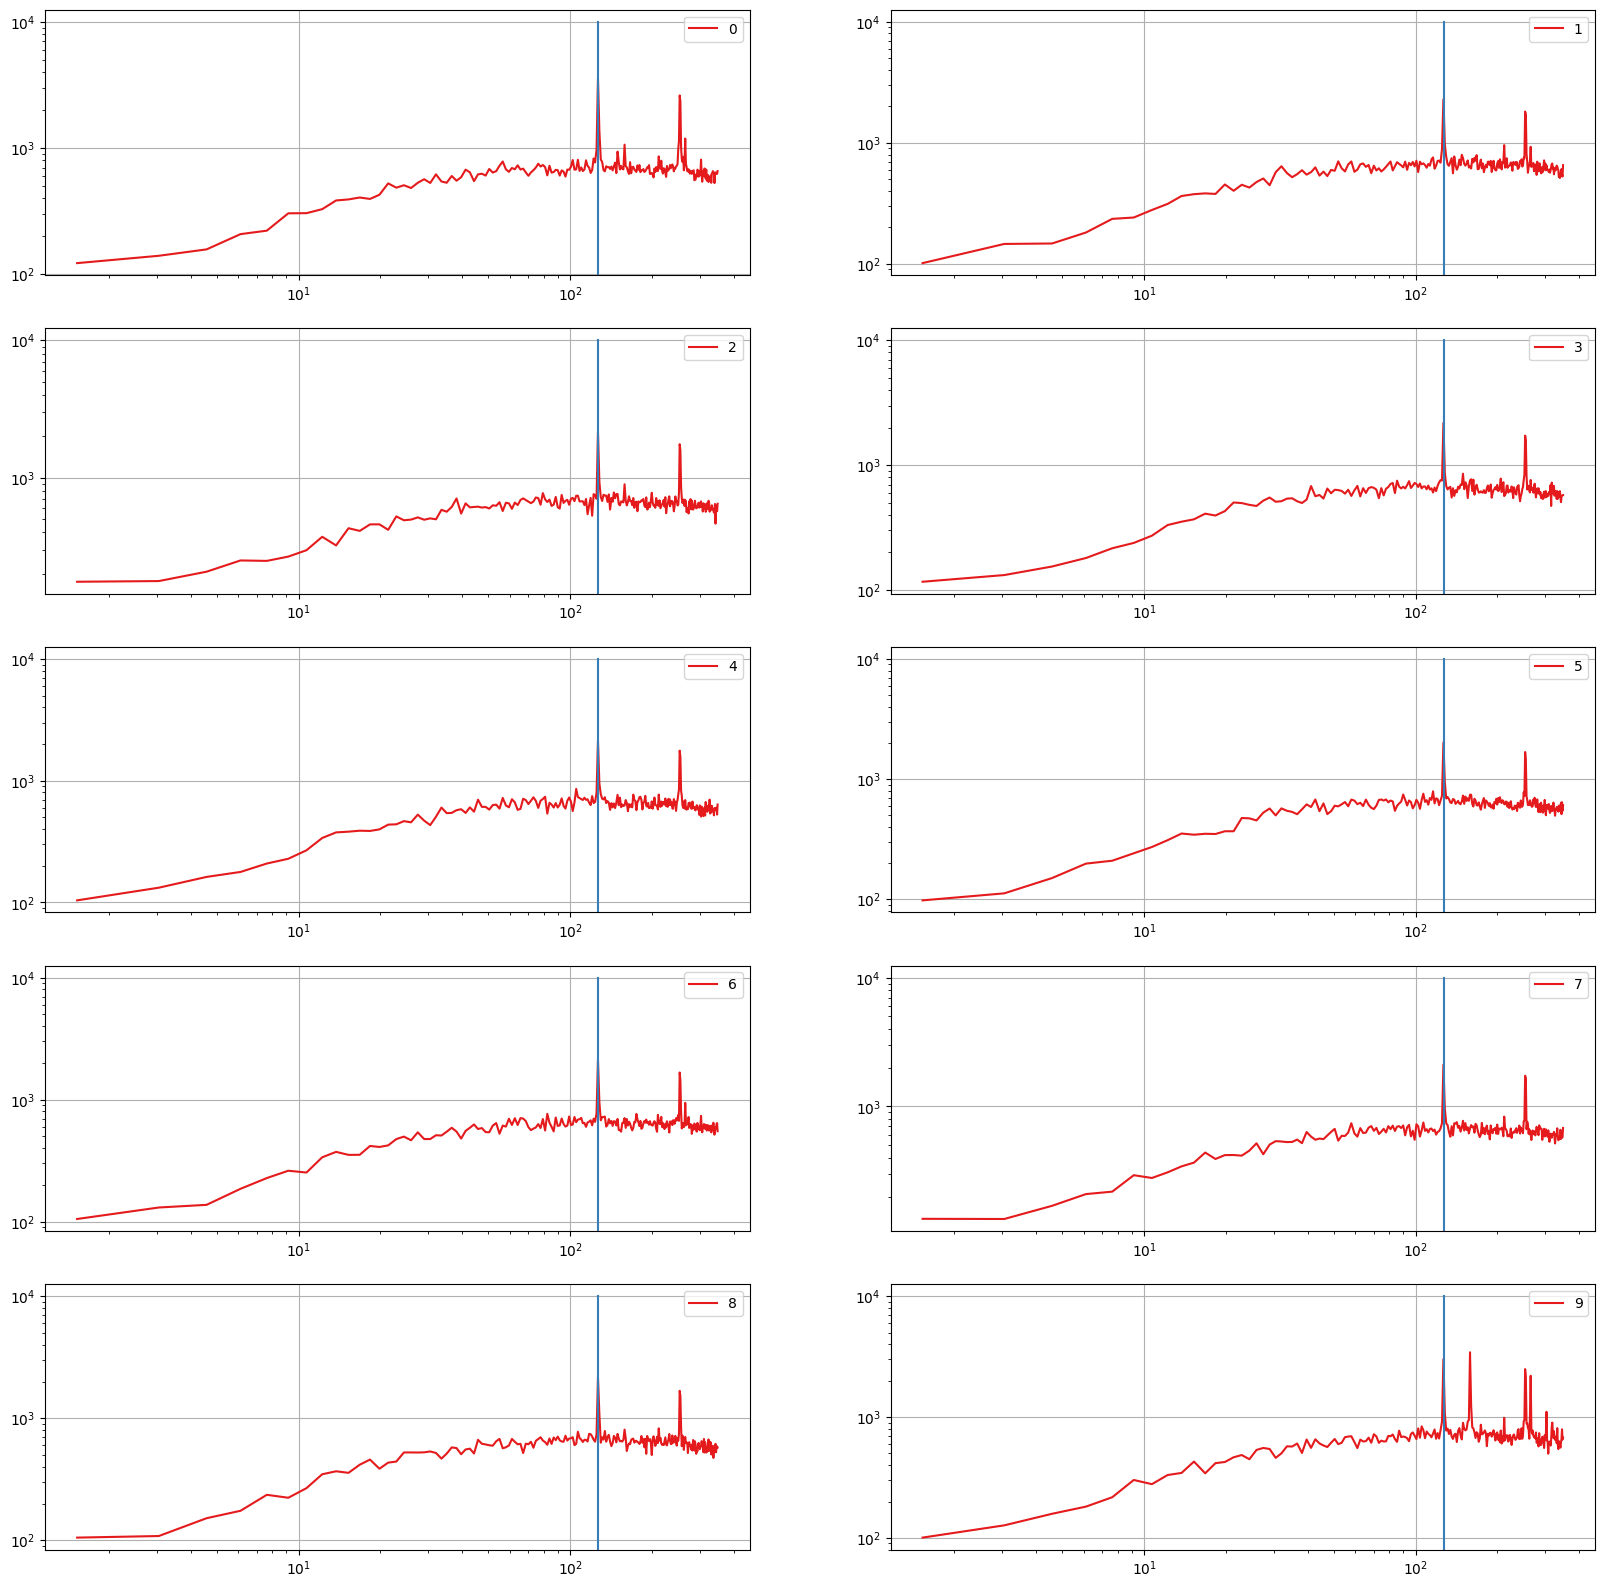

In [8]:
myvs.show_multiple_fig(x,df_MTQ_noise.values.tolist()[:10],plot_line_number=2,log_scale=True)

In [5]:
df_data = myds.concat_npz()

In [6]:
df_data_pre = df_data[(df_data < 10**10).all(axis=1)]
df_data_pre = df_data_pre.iloc[:,start:stop]
df_data_pre = myds.delete_0_gyou(df_data_pre)
df_data_pre

0           1           2           3           4    \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
103603  122.093491  116.433336  145.048783  114.312061  192.500221   
103604  104.721016  133.593078  151.468548  248.887670  189.338949   
103605   46.706180  152.973006  166.045044  166.933334  203.486829   
103606  105.969081  152.464743  240.822518  264.686312  293.389996   
103607  144.451794   98.450465  165.335247  225.233102  234.669472   

               5           6           7           8           9    ...  \
0       458.932187  292.656312  307.286854  387.060255  316.580215  ...   
1       172.916762  365.257365  228.995861  334.066903  332.763197  ...   
2       175.660607  169.937570  264.225008  296.083163  214.468419  ...   
3       246.746340  190.952035  221.437342  354.225474  365.486685  ...   
4       265.994181  350.298726  220.398215  326.459230  378.799860  ...   
...            ...         ...         ...         ...         ...  ...   
103603  288.475542  235.521077  326.818310  325.784505  413.378888  ...   
103604  276.713913  191.168293  400.484528  327.071259  432.536595  ...   
103605  321.153870  251.722031  296.447174  325.160645  502.389947  ...   
103606  274.296324  175.683277  307.671430  405.552416  286.639501  ...   
103607  219.059660  341.781429  401.365567  312.127433  442.259728  ...   

               252         253         254         255         256  \
0       598.072077  450.248620  436.755299  554.903016  630.636569   
1       505.356326  442.951352  440.692188  459.542539  510.488376   
2       474.918907  519.410061  386.751969  341.400901  543.003736   
3       603.789469  588.881506  536.064374  565.279527  572.463645   
4       554.189074  802.958199  365.246616  455.775853  841.202504   
...            ...         ...         ...         ...         ...   
103603  644.960138  597.889270  430.722591  389.395318  445.077553   
103604  460.948688  857.815629  396.674151  601.494973  398.180535   
103605  694.677972  420.530717  660.903695  611.648824  427.274455   
103606  416.329500  599.345601  795.765601  691.484669  467.743692   
103607  560.986147  582.368125  490.482248  621.975842  498.063038   

               257         258         259         260         261  
0       453.343581  774.837218  610.187719  537.316204  577.191976  
1       422.290924  580.424109  444.754962  408.722033  703.522900  
2       721.183140  550.976003  404.134914  533.712908  486.188758  
3       479.871693  414.647192  722.415135  611.531242  439.853878  
4       533.128519  564.370118  709.542383  371.949513  677.072262  
...            ...         ...         ...         ...         ...  
103603  558.273959  625.114131  439.442856  496.374094  629.859228  
103604  447.219666  514.819600  480.025835  444.866511  627.011712  
103605  761.617259  632.807768  619.449803  559.546080  858.319041  
103606  669.514363  428.914913  406.351107  446.843893  612.631281  
103607  631.618152  464.370946  577.037630  593.137361  443.150123  

[103608 rows x 262 columns]

In [8]:
b = []
for i in range(8):
    a = (df_data > 10**i).any(axis=1).sum()
    b.append(a)

In [7]:
df_train,df_test = myds.train_test_dataframe(df_data=df_data_pre)
df_train = pd.concat([df_train,df_MTQNoise_pre,df_ImamuraAbnormal_pre])
df_train.index = range(len(df_train))
df_train

0           1           2           3           4    \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
104439  355.217192  156.399793  166.019671  198.384994  225.776400   
104440  371.715936  153.365039  150.408107  196.258235  213.059565   
104441  339.493341  172.065658  159.476038  184.333826  192.349654   
104442  291.075822  151.676753  174.019234  180.799240  184.088673   
104443  357.759634  151.694597  152.637684  192.016122  192.844064   

               5           6           7           8           9    ...  \
0       458.932187  292.656312  307.286854  387.060255  316.580215  ...   
1       172.916762  365.257365  228.995861  334.066903  332.763197  ...   
2       175.660607  169.937570  264.225008  296.083163  214.468419  ...   
3       246.746340  190.952035  221.437342  354.225474  365.486685  ...   
4       265.994181  350.298726  220.398215  326.459230  378.799860  ...   
...            ...         ...         ...         ...         ...  ...   
104439  252.953558  247.176909  375.444268  514.476939  365.125588  ...   
104440  241.756654  267.752230  318.121015  489.978479  399.870585  ...   
104441  251.711225  275.325876  346.019341  485.400973  355.564324  ...   
104442  226.376313  292.429978  317.118807  460.521005  362.636398  ...   
104443  259.057854  273.008020  319.235240  495.596096  378.716803  ...   

               252         253         254         255         256  \
0       598.072077  450.248620  436.755299  554.903016  630.636569   
1       505.356326  442.951352  440.692188  459.542539  510.488376   
2       474.918907  519.410061  386.751969  341.400901  543.003736   
3       603.789469  588.881506  536.064374  565.279527  572.463645   
4       554.189074  802.958199  365.246616  455.775853  841.202504   
...            ...         ...         ...         ...         ...   
104439  566.878952  615.428940  536.993496  619.065601  572.555419   
104440  548.183512  613.978505  633.565723  624.532991  500.378263   
104441  585.370690  592.977456  537.852943  564.193527  506.592656   
104442  594.420446  566.191055  583.175991  582.232090  507.000760   
104443  562.185464  533.685312  633.380612  505.183689  622.764235   

               257         258         259         260         261  
0       453.343581  774.837218  610.187719  537.316204  577.191976  
1       422.290924  580.424109  444.754962  408.722033  703.522900  
2       721.183140  550.976003  404.134914  533.712908  486.188758  
3       479.871693  414.647192  722.415135  611.531242  439.853878  
4       533.128519  564.370118  709.542383  371.949513  677.072262  
...            ...         ...         ...         ...         ...  
104439  550.982256  604.678577  607.688011  474.209352  572.210552  
104440  545.923901  576.698857  537.656098  569.138377  565.046835  
104441  538.986335  631.813060  577.000889  572.599777  584.777962  
104442  451.609194  561.866751  556.554693  552.587848  582.518347  
104443  492.910111  633.315940  542.249298  612.497866  585.232062  

[104444 rows x 262 columns]

In [32]:
# 0-102572 102573-103004#MTQ 103005-104444#Imamura

103611

## データを見る

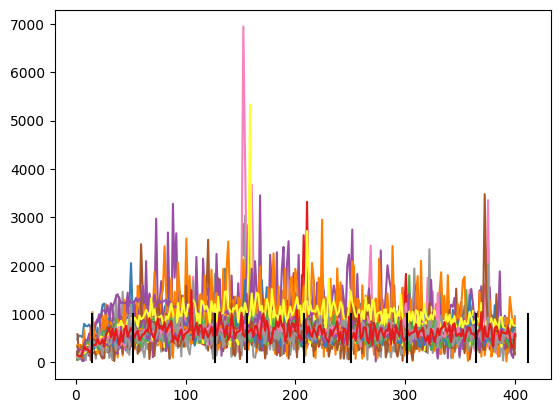

In [8]:
fig,ax = plt.subplots()

for d in df_train[::100].values.tolist()[0:100]:
    ax.plot(x,d)
    
ax.plot([15,15],[0,1000],color="black") # STC
ax.plot([52,52],[0,1000],color="black") # JTC
ax.plot([127,127],[0,1000],color="black") #MTQ
ax.plot([156,156],[0,1000],color="black") # JTC3
ax.plot([208,208],[0,1000],color="black") # JTC4
ax.plot([251,251],[0,1000],color="black") #??
ax.plot([302,302],[0,1000],color="black") #?
ax.plot([364,364],[0,1000],color="black") #JTC7
ax.plot([412,412],[0,1000],color="black") #??

In [9]:
len(df_train[(df_train>2500).any(axis=1)])/len(df_train)

0.1345601470644556

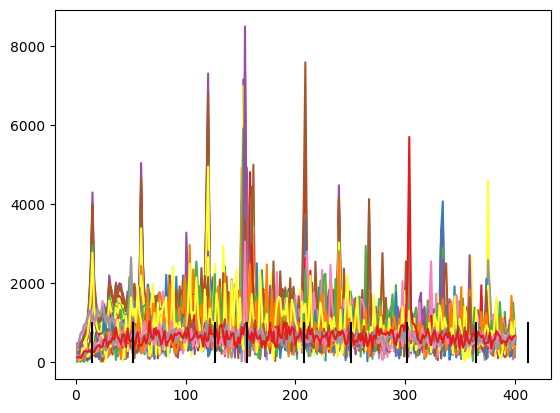

In [7]:
fig,ax = plt.subplots()

for d in df_train[(df_train>2500).any(axis=1)].values.tolist()[0:100]:
    ax.plot(x,d)
    
ax.plot([15,15],[0,1000],color="black") # STC
ax.plot([52,52],[0,1000],color="black") # JTC
ax.plot([127,127],[0,1000],color="black") #MTQ
ax.plot([156,156],[0,1000],color="black") # JTC3
ax.plot([208,208],[0,1000],color="black") # JTC4
ax.plot([251,251],[0,1000],color="black") #??
ax.plot([302,302],[0,1000],color="black") #?
ax.plot([364,364],[0,1000],color="black") #JTC7
ax.plot([412,412],[0,1000],color="black") #??



(0.0, 3000.0)

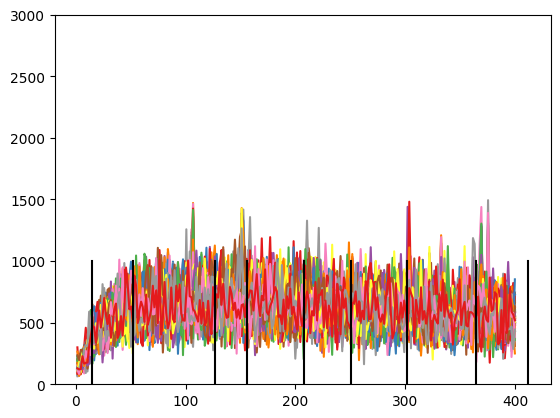

In [12]:
fig,ax = plt.subplots()

for d in df_train[(df_train<1500).all(axis=1)].values.tolist()[0:100]:
    ax.plot(x,d)
    
ax.plot([15,15],[0,1000],color="black") # STC
ax.plot([52,52],[0,1000],color="black") # JTC
ax.plot([127,127],[0,1000],color="black") #MTQ
ax.plot([156,156],[0,1000],color="black") # JTC3
ax.plot([208,208],[0,1000],color="black") # JTC4
ax.plot([251,251],[0,1000],color="black") #??
ax.plot([302,302],[0,1000],color="black") #?
ax.plot([364,364],[0,1000],color="black") #JTC7
ax.plot([412,412],[0,1000],color="black") #??

ax.set_ylim(0,3000)

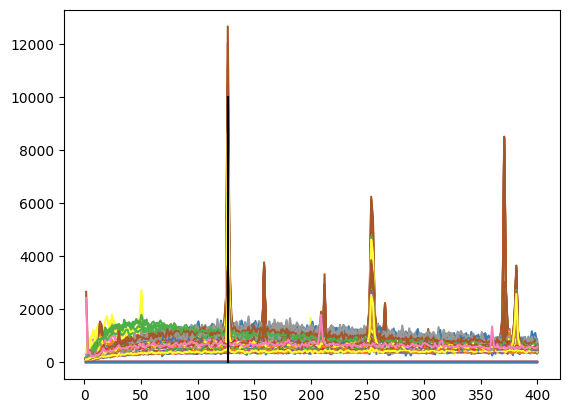

In [12]:
# MTQ

lim=10000
fig,ax = plt.subplots()

for d in df_train.values.tolist()[102575:103006]:
    ax.plot(x,d)
    
ax.plot([127,127],[0,lim],color="black") #MTQ 82

(0.0, 10000.0)

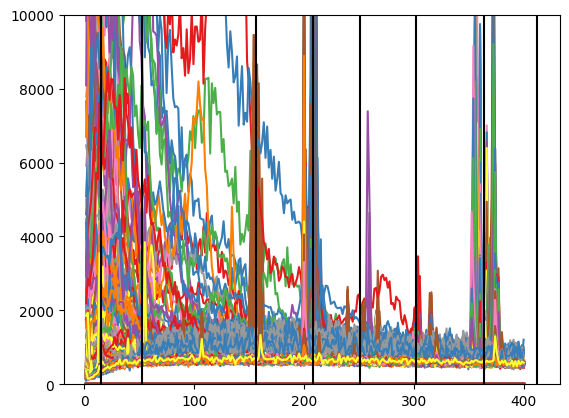

In [11]:
lim = 10000
fig,ax = plt.subplots()

for d in df_train.values.tolist()[103007:104446]:
    ax.plot(x,d)
    
ax.plot([15,15],[0,lim],color="black") # STC
ax.plot([52,52],[0,lim],color="black") # JTC
ax.plot([156,156],[0,lim],color="black") # JTC3
ax.plot([208,208],[0,lim],color="black") # JTC4
ax.plot([251,251],[0,lim],color="black") #??
ax.plot([302,302],[0,lim],color="black") #?
ax.plot([364,364],[0,lim],color="black") #JTC7
ax.plot([412,412],[0,lim],color="black") #??

ax.set_ylim(0,10000)

## TSNE
- 今回はちょっと違った

In [74]:
from sklearn.manifold import TSNE

In [75]:
df_train_nontsne,df_tsne = myds.train_test_dataframe_save_index(df_data=df_train,frac=0.05)
df_tsne

0           1           2           3           4    \
6        98.109885  105.201278  127.834172  214.204911  197.691964   
14       96.034300  193.242926  168.739584  170.807764  208.406938   
25      113.410507  135.773602  209.710912  242.327351  216.436255   
36      118.585229  159.962105  165.996610  184.457149  199.906622   
56       83.100214  121.935528  137.145663  144.385560  288.339381   
...            ...         ...         ...         ...         ...   
104361  251.587883  237.697800  178.007534  170.351613  205.644725   
104372  244.236476  259.015027  198.326484  172.443460  182.420274   
104376  125.272476  122.143837  167.286039  177.549240  190.488627   
104397  133.157710  127.425822  169.283035  614.027847  228.508371   
104439  358.920778  170.632156  167.235898  190.314470  223.465240   

               5           6           7           8           9    ...  \
6       203.358062  140.233112  319.215625  325.993221  328.634177  ...   
14      198.889754  185.675458  229.172622  290.773591  474.497332  ...   
25      307.830127  320.132845  274.673676  366.828900  527.091862  ...   
36      246.783884  274.061010  305.942662  327.543835  428.056219  ...   
56      251.951703  293.858325  298.716874  395.808737  252.389013  ...   
...            ...         ...         ...         ...         ...  ...   
104361  239.742098  264.949980  294.877330  474.579982  357.683424  ...   
104372  258.835268  312.879192  330.461357  513.105215  388.515760  ...   
104376  210.293202  277.650482  295.199792  319.311249  354.173860  ...   
104397  221.326114  288.933389  311.330371  357.891285  288.857923  ...   
104439  283.551063  303.304133  341.366635  505.071108  364.212863  ...   

                219         220         221         222         223  \
6       1082.656925  549.100539  620.207025  555.310442  702.581208   
14       804.769183  562.498098  729.200539  545.483815  705.288075   
25       604.945424  597.626737  547.945321  609.975653  622.631305   
36       566.986744  570.377676  634.542078  593.672104  610.154341   
56       594.002909  485.076624  487.503541  822.449966  710.138104   
...             ...         ...         ...         ...         ...   
104361   556.917908  578.821536  528.768851  575.917570  543.788468   
104372   613.958967  646.462705  630.374445  537.101660  601.009652   
104376   544.634823  569.457775  615.381823  593.124148  585.766006   
104397   599.614418  587.236822  512.008325  593.384713  530.641697   
104439   647.924704  660.994883  599.557421  609.849631  503.304358   

               224         225         226          227         228  
6       526.689733  403.829823  528.024485   509.332395  576.853573  
14      371.294939  620.496629  576.855568   471.360577  954.148622  
25      532.196565  529.111806  567.805881   365.631211  627.051277  
36      557.955553  620.993222  608.449282   589.765126  604.588194  
56      798.266516  739.855190  591.347602  1002.720816  440.825188  
...            ...         ...         ...          ...         ...  
104361  591.695843  587.106421  547.195335   621.646675  591.736318  
104372  643.287475  561.791411  560.136167   646.892831  655.050502  
104376  591.996708  572.122142  574.506334   586.387861  538.568418  
104397  624.529698  599.312331  679.883355   542.673751  549.199399  
104439  693.641071  583.467654  587.928560   618.324769  591.040619  

[5222 rows x 229 columns]

In [76]:
tsne = TSNE(random_state=0)
List_tsne_transform = tsne.fit_transform(df_tsne)

In [77]:
df_tsne_transform = pd.DataFrame(List_tsne_transform)
df_tsne_transform.index = df_tsne.index

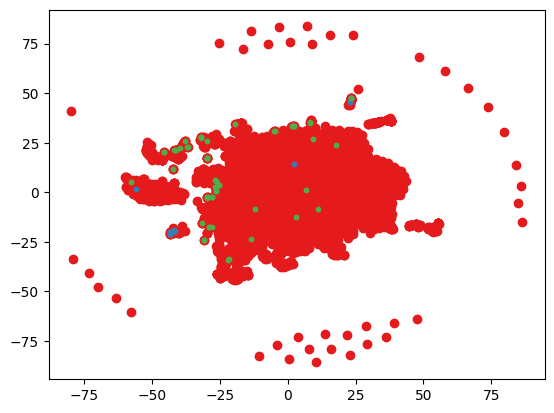

In [83]:
fig,ax = plt.subplots()

ax.scatter(List_tsne_transform.T[0],List_tsne_transform.T[1])
ax.scatter(list(df_tsne_transform.loc[102575:103006,0]),list(df_tsne_transform.loc[102575:103006,1]),s=10)
ax.scatter(list(df_tsne_transform.loc[103007:104446,0]),list(df_tsne_transform.loc[103007:104446,1]),s=10)

## PCA
- 特定の周波数ででるはず？
- 

In [15]:
from sklearn.decomposition import PCA

In [56]:
n_components=200
pca = PCA(n_components)
pca.fit(df_train)
List_train_pca = pca.transform(df_train)

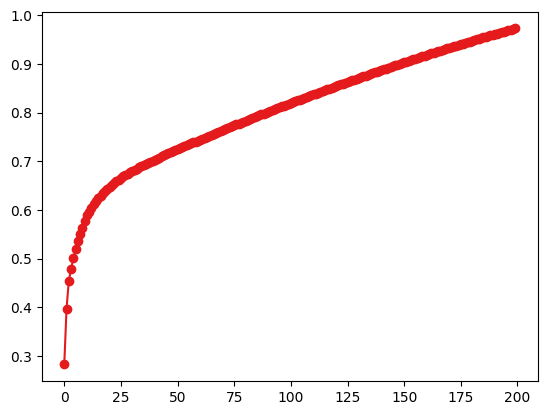

In [57]:
fig,ax = plt.subplots()
ax.plot(range(n_components),np.cumsum(pca.explained_variance_ratio_))
ax.scatter(range(n_components),np.cumsum(pca.explained_variance_ratio_))

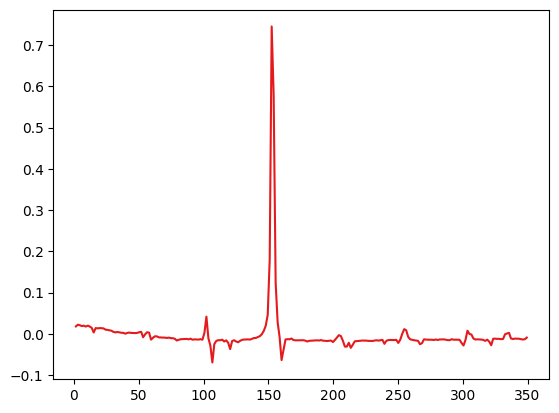

In [58]:
fig,ax = plt.subplots()
ax.plot(x,pca.components_[2])

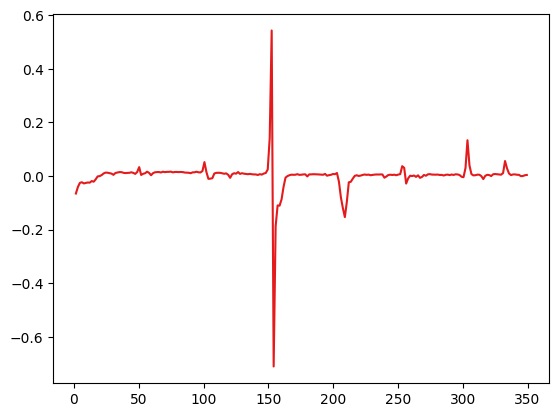

In [22]:
fig,ax = plt.subplots()
ax.plot(x,pca.components_[3])

In [49]:
def show_multiple_fig(x,data,plot_line_number=4,type="line",log_scale=False,xticks=True,grid=True,xlim=1000,legend=False):

        """
        x:nのリスト
        data:nのリスト
        """

        n_cluster = len(data)

        fig,ax = plt.subplots(math.ceil(n_cluster/plot_line_number),plot_line_number,figsize=(20,20))

        for i,d in enumerate(data):

            yoko = i%plot_line_number
            tate = i//plot_line_number

            if type == "line":
                ax[tate][yoko].plot(x,d,label=f"{i}")
            elif type == "scatter":
                ax[tate][yoko].scatter(x,d,label=f"{i}")
            ax[tate][yoko].plot([127,127],[0,0.4])
            ax[tate][yoko].plot([52,52],[0,0.4])
            ax[tate][yoko].plot([15,15],[0,0.4])
            ax[tate][yoko].plot([156,156],[0,0.4])
            ax[tate][yoko].plot([208,208],[0,0.4])
            ax[tate][yoko].plot([364,364],[0,0.4])
            ax[tate][yoko].plot([251,251],[0,0.4])
            ax[tate][yoko].plot([302,302],[0,0.4])
            ax[tate][yoko].plot([412,412],[0,0.4])
            
            ax[tate][yoko].set_xlim(0,0.4)
            
            if legend:
                ax[tate][yoko].legend()
            
            if xticks:
                ax[tate][yoko].set_xticks(x)
            
            if grid:
            
                ax[tate][yoko].grid()
            
            if log_scale:
            
                ax[tate][yoko].set_xscale("log")
                ax[tate][yoko].set_yscale("log")
                
            



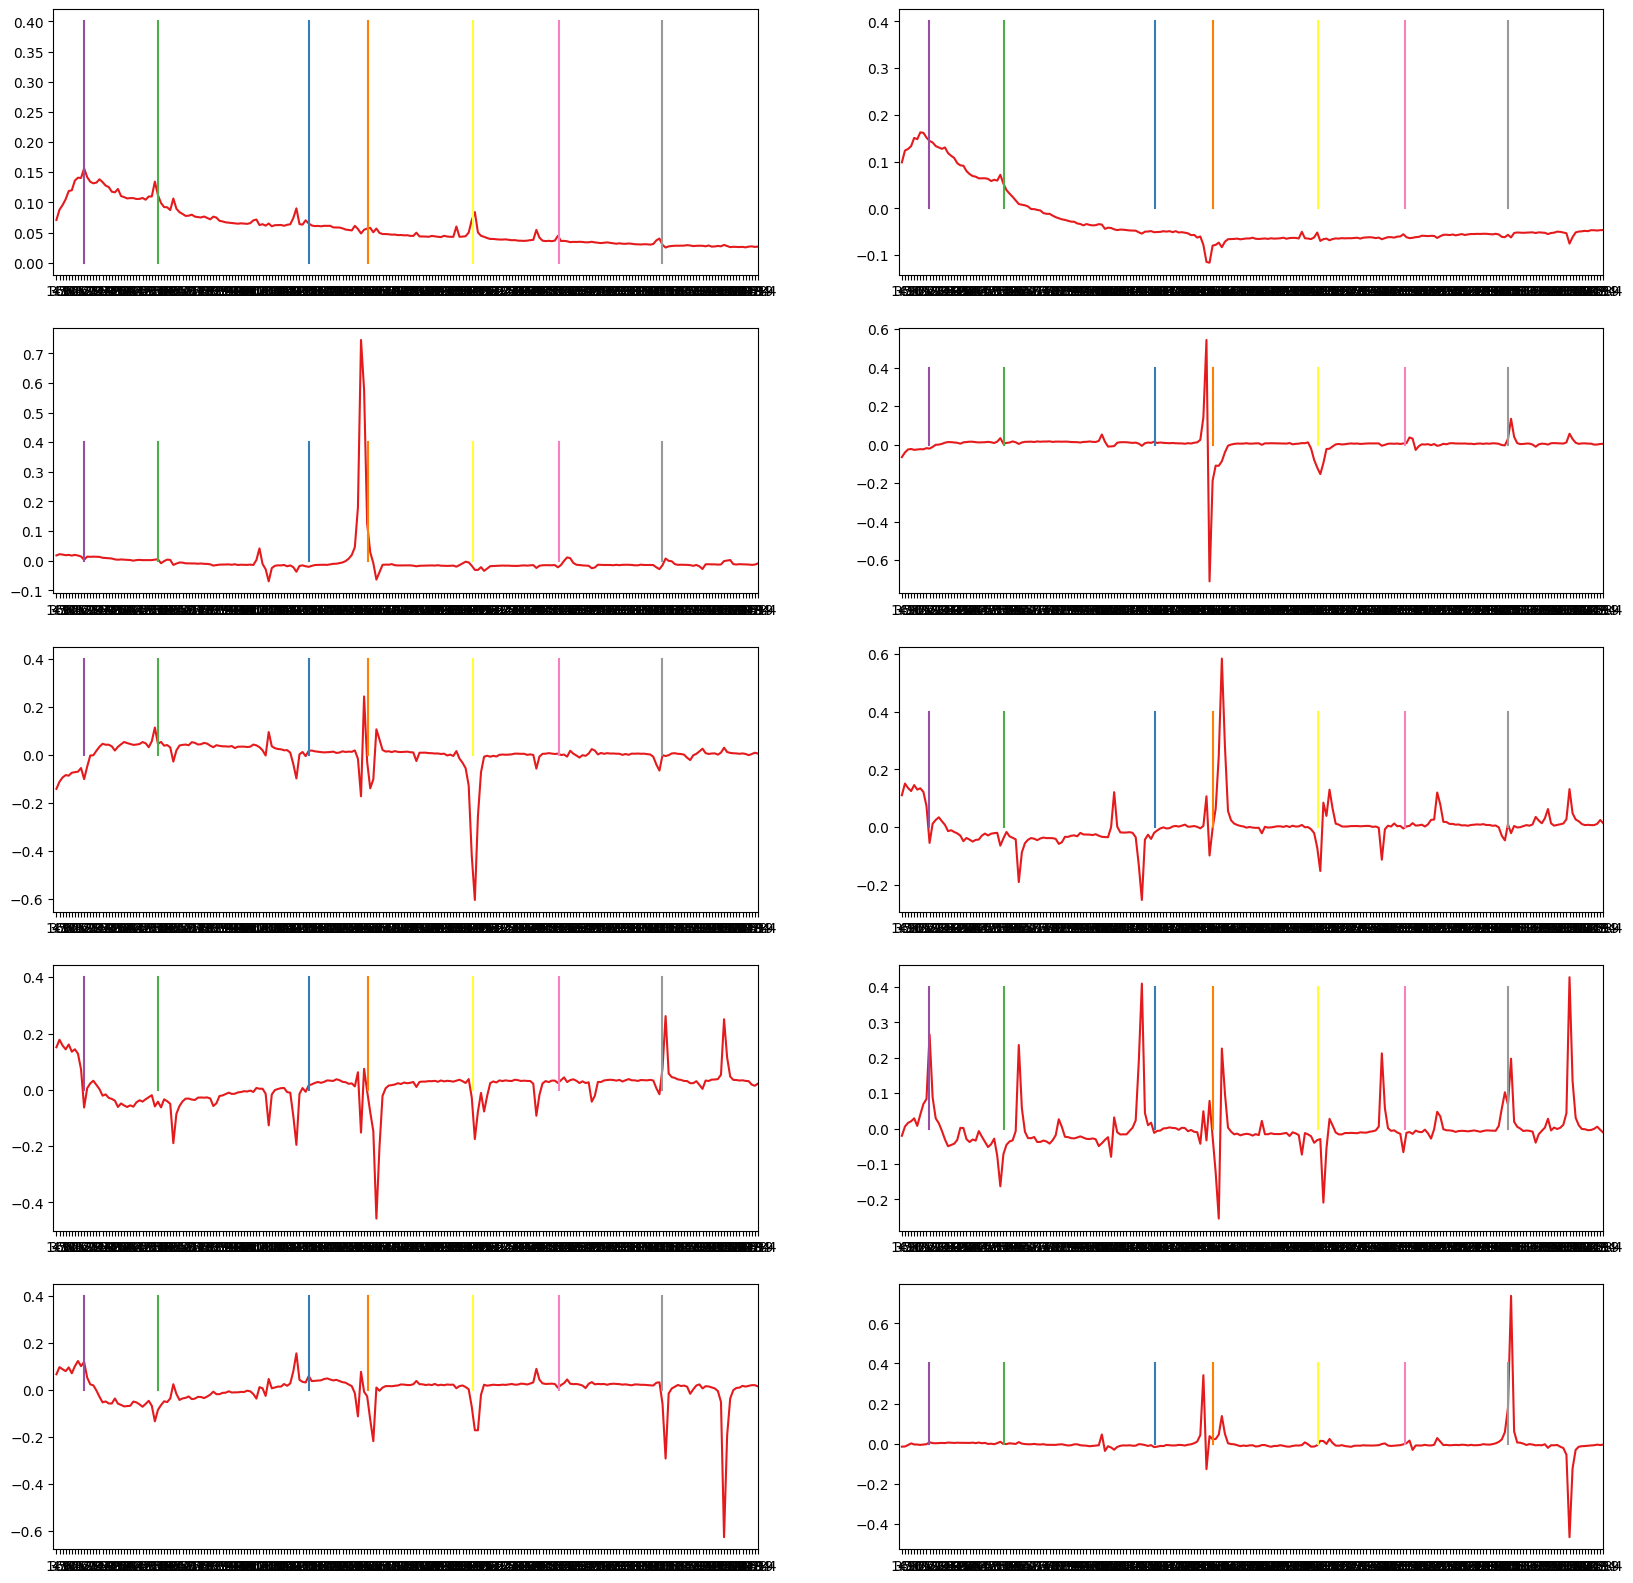

In [59]:
show_multiple_fig(x,pca.components_[:10],plot_line_number=2,grid=False,xlim=0.1)

## 標準化


In [17]:
from sklearn.preprocessing import StandardScaler

In [21]:
std = StandardScaler()
std.fit(df_train)
df_train_std = pd.DataFrame(std.transform(df_train))

## Kmeans

In [91]:
from sklearn.cluster import MiniBatchKMeans

In [45]:
def show_multiple_fig(x,data,plot_line_number=4,type="line",log_scale=False,xticks=True,grid=True,xlim=1000,legend=False):

        """
        x:nのリスト
        data:nのリスト
        """

        n_cluster = len(data)

        
       
        if n_cluster<=plot_line_number:
            
            fig,ax = plt.subplots(1,n_cluster,figsize=(20,8))
            
            for i,d in enumerate(data):

                yoko = i

                if type == "line":
                    ax[yoko].plot(x,d,label=f"{i}")
                elif type == "scatter":
                    ax[yoko].scatter(x,d,label=f"{i}")

                ax[yoko].plot([15,15],[0,1000]) # STC
                ax[yoko].plot([52,52],[0,1000]) # JTC
                ax[yoko].plot([127,127],[0,1000]) #MTQ
                ax[yoko].plot([156,156],[0,1000]) # JTC3
                ax[yoko].plot([208,208],[0,1000]) # JTC4
                ax[yoko].plot([251,251],[0,1000]) #??
                ax[yoko].plot([302,302],[0,1000]) #??
                ax[yoko].plot([364,364],[0,1000]) #JTC7
                ax[yoko].plot([412,412],[0,1000]) #??

        else:
            fig,ax = plt.subplots(math.ceil(n_cluster/plot_line_number),plot_line_number,figsize=(20,10*math.ceil(n_cluster/plot_line_number)))
       
            for i,d in enumerate(data):

                yoko = i%plot_line_number
                tate = i//plot_line_number

                if type == "line":
                    ax[tate][yoko].plot(x,d,label=f"{i}")
                elif type == "scatter":
                    ax[tate][yoko].scatter(x,d,label=f"{i}")
            
            
                ax[tate][yoko].plot([15,15],[0,1000]) # STC
                ax[tate][yoko].plot([52,52],[0,1000]) # JTC
                ax[tate][yoko].plot([127,127],[0,1000]) #MTQ
                ax[tate][yoko].plot([156,156],[0,1000]) # JTC3
                ax[tate][yoko].plot([208,208],[0,1000]) # JTC4
                ax[tate][yoko].plot([251,251],[0,1000]) #??
                ax[tate][yoko].plot([302,302],[0,1000]) #??
                ax[tate][yoko].plot([364,364],[0,1000]) #JTC7
                ax[tate][yoko].plot([412,412],[0,1000]) #??
            
                ax[tate][yoko].set_xlim(0,0.4)

                if legend:
                    ax[tate][yoko].legend()

                if xticks:
                    ax[tate][yoko].set_xticks(x)

                if grid:

                    ax[tate][yoko].grid()

                if log_scale:

                    ax[tate][yoko].set_xscale("log")
                    ax[tate][yoko].set_yscale("log")

        
            
        

In [16]:
n_clusters=3
miniK = MiniBatchKMeans(n_clusters=n_clusters)
miniK.fit(df_train_std)
List_kmeans_result = np.array(miniK.predict(df_train_std))

In [17]:
a = [df_train[List_kmeans_result == i].values.tolist() for i in range(n_clusters)]
List_kmeans_avarage = myvs.avarange(a)

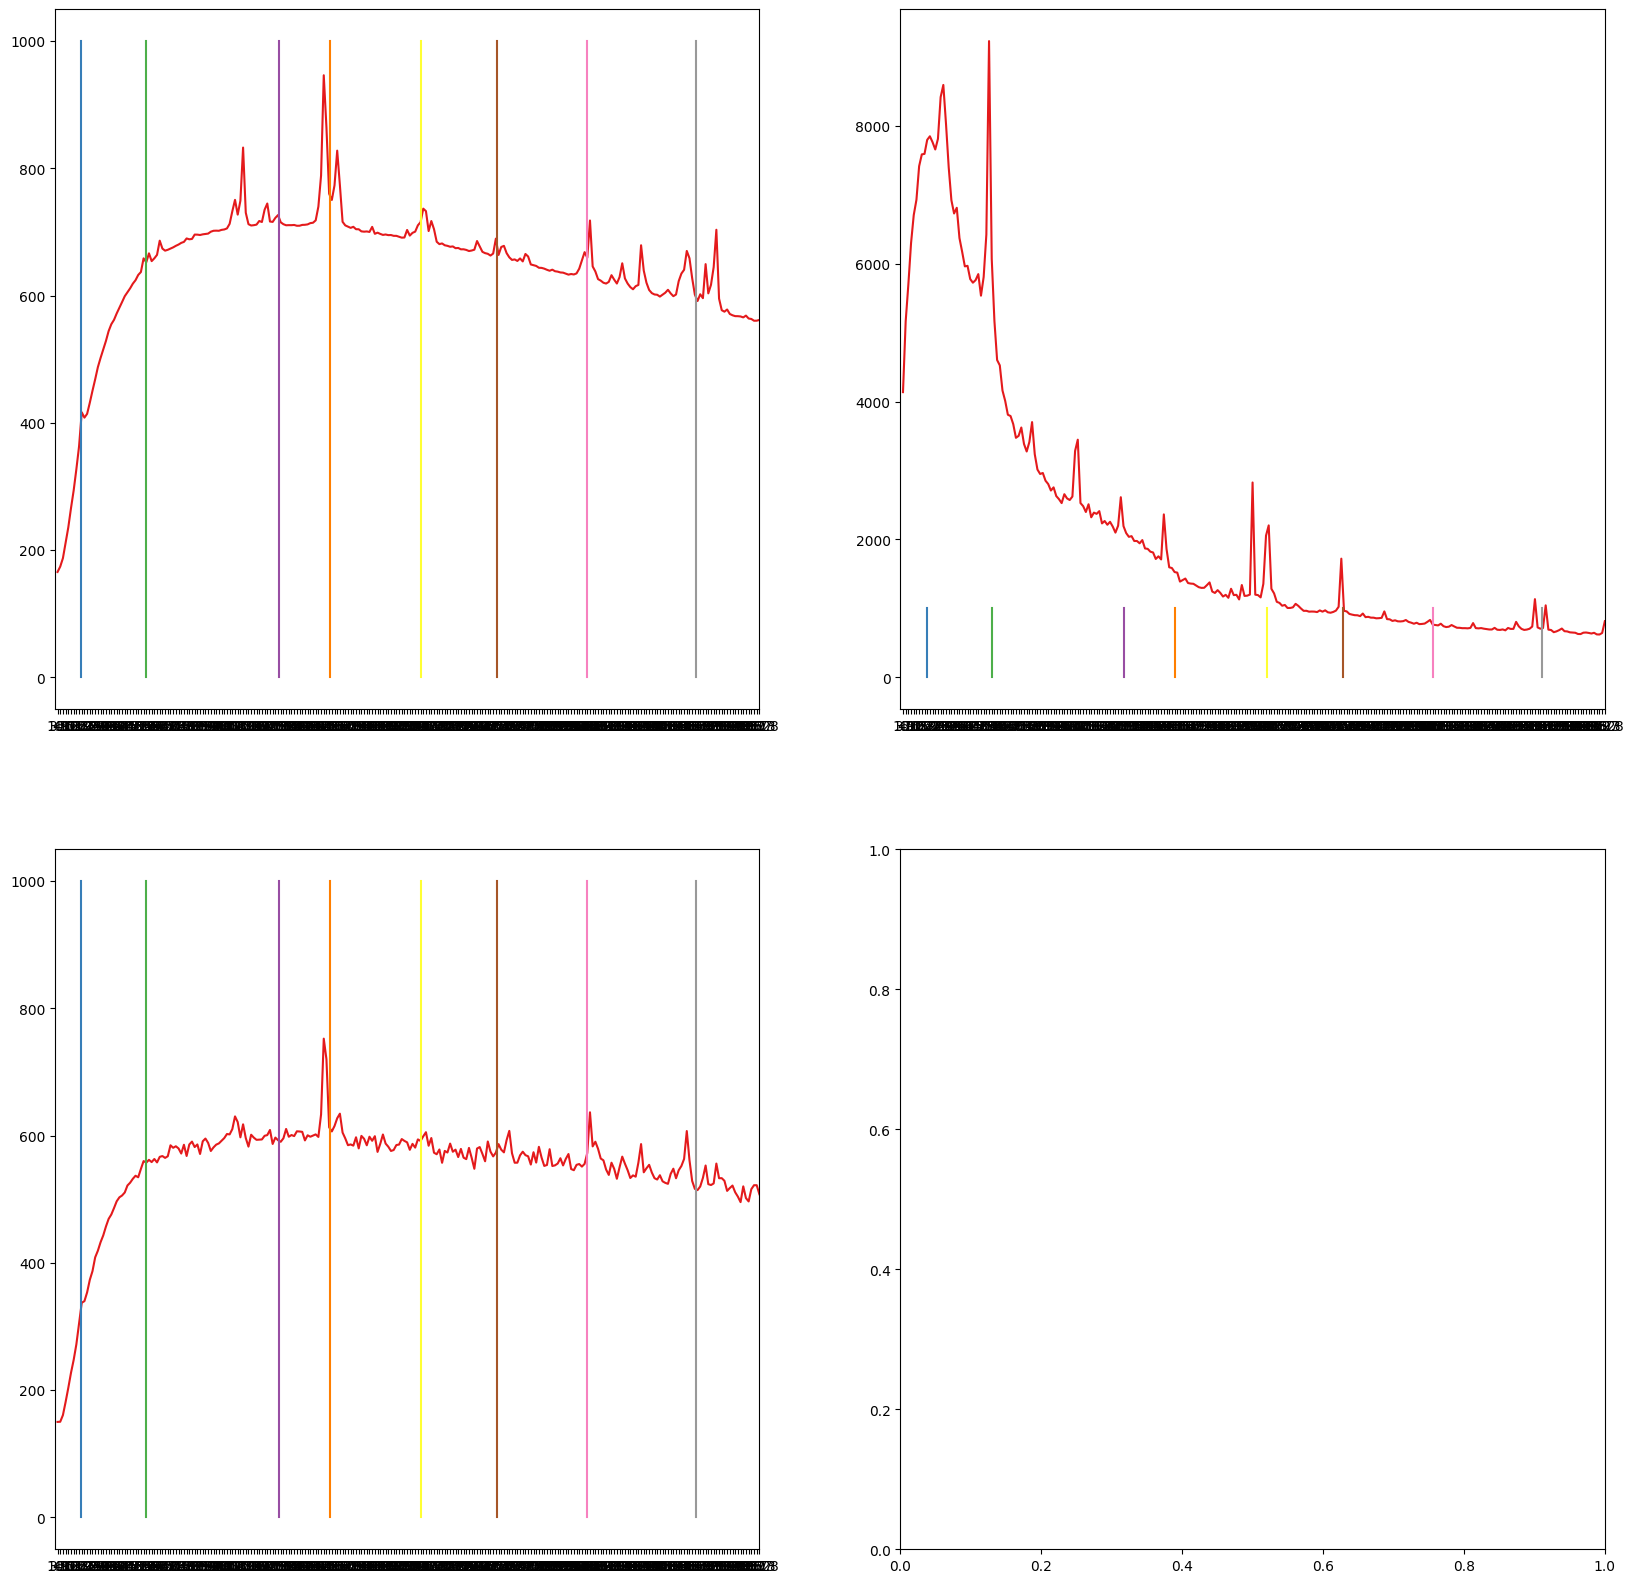

In [19]:
show_multiple_fig(x,List_kmeans_avarage[0:3],plot_line_number=2,grid=False)

## 再構成二乗誤差法

In [26]:
df_saikousei_train_std = df_train_std.sample(frac=0.5,random_state=0)
df_saikousei_test_std = df_train_std[~df_train_std.index.isin(df_saikousei_train.index)]

In [98]:
List_saikousei_train_std = df_saikousei_train_std.values.tolist()
List_saikousei_test_std = df_saikousei_test_std.values.tolist()

In [23]:
import functools

def J_PCA(k,X_train,X_test=False):
    if X_test == False:
        X_test = X_train
        
    pca = PCA(n_components=k,random_state=0)
    pca.fit(X_train)
    W = pca.components_
    mu = np.array(X_test).mean(axis=0)
    
    y_expect = np.array(list(map(functools.partial(y_recon_func,W=W,mu=mu),X_test)))
    gosa = y_expect-X_test
    J_pca = np.sum(gosa**2,axis=1)
    
    return J_pca

def y_recon_func(x,W,mu):
    return np.dot(W.T,np.dot(W,x-mu))+mu

In [28]:
J_PCA_list=[]
for k in range(1,9):
    J_PCA_list.append(sum(J_PCA(k,List_saikousei_train_std)))

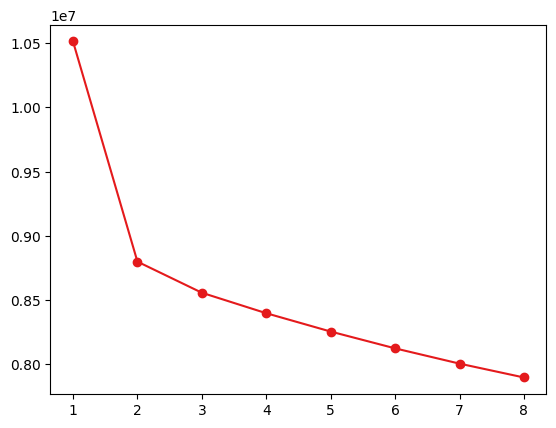

In [29]:
fig,ax = plt.subplots()

ax.plot(range(1,9),J_PCA_list)
ax.scatter(range(1,9),J_PCA_list)

In [30]:
k=2

In [31]:
J_PCA_List = np.array(J_PCA(k,df_saikousei_train_std.values.tolist(),df_saikousei_test_std.values.tolist()))
J_PCA_List = pd.DataFrame(J_PCA_List)

In [32]:
J_PCA_List.index = df_saikousei_test_std.index

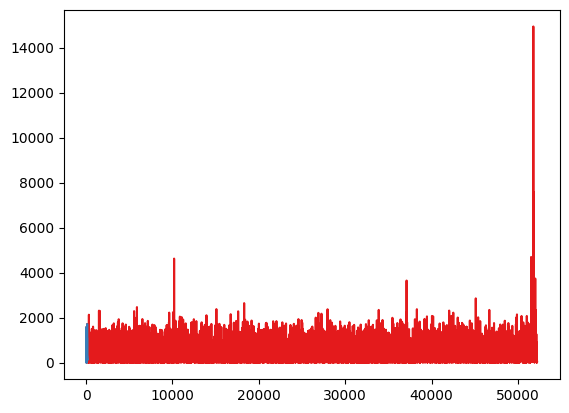

In [66]:
fig,ax = plt.subplots()

lim = len(J_PCA_List)

ax.plot(range(len(J_PCA_List)),J_PCA_List)

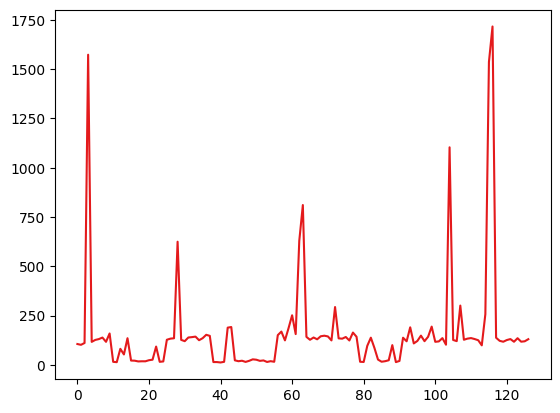

In [67]:
fig,ax = plt.subplots()
ax.plot(range(len(J_PCA_List[J_PCA_List.index.isin(df_train[(df_train>2500).any(axis=1)])])),J_PCA_List[J_PCA_List.index.isin(df_train[(df_train>2500).any(axis=1)])])

(array([7.6120e+03, 5.9510e+03, 1.7980e+03, 9.7900e+02, 1.0410e+03,
        6.5200e+03, 1.3351e+04, 6.2030e+03, 1.6550e+03, 8.1300e+02,
        5.5800e+02, 4.3700e+02, 3.0800e+02, 2.5900e+02, 2.8800e+02,
        2.8100e+02, 1.9800e+02, 1.5800e+02, 1.4100e+02, 1.2200e+02,
        1.2200e+02, 1.5300e+02, 8.9000e+01, 6.3000e+01, 5.5000e+01,
        5.5000e+01, 8.5000e+01, 7.8000e+01, 7.0000e+01, 1.2400e+02,
        8.0000e+01, 9.2000e+01, 5.8000e+01, 7.2000e+01, 7.8000e+01,
        7.0000e+01, 6.2000e+01, 5.7000e+01, 3.8000e+01, 5.1000e+01,
        6.1000e+01, 4.9000e+01, 5.8000e+01, 5.9000e+01, 5.7000e+01,
        6.3000e+01, 6.0000e+01, 5.8000e+01, 6.0000e+01, 5.2000e+01,
        6.0000e+01, 5.9000e+01, 5.6000e+01, 4.7000e+01, 5.9000e+01,
        4.6000e+01, 4.8000e+01, 5.2000e+01, 4.2000e+01, 5.4000e+01,
        5.8000e+01, 3.1000e+01, 4.1000e+01, 5.5000e+01, 3.7000e+01,
        3.2000e+01, 4.0000e+01, 4.3000e+01, 3.3000e+01, 4.1000e+01,
        2.9000e+01, 2.1000e+01, 3.2000e+01, 2.10

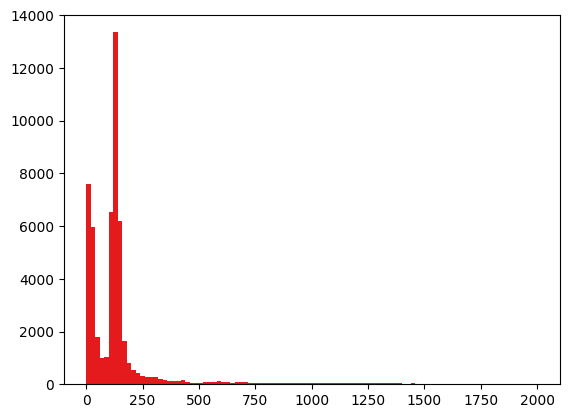

In [36]:
fig,ax = plt.subplots()
ax.hist(J_PCA_List,bins=100,range=[0,2000])

In [75]:
df_saikousei_PCA_normal = df_train[df_train.index.isin(J_PCA_List[J_PCA_List[0]<200].index)]
List_saikousei_PCA_normal = df_saikousei_PCA_normal.values.tolist()

In [76]:
len(List_saikousei_PCA_normal)

45923

In [77]:
len(df_saikousei_PCA_normal[(df_saikousei_PCA_normal>2500).any(axis=1)])

2714

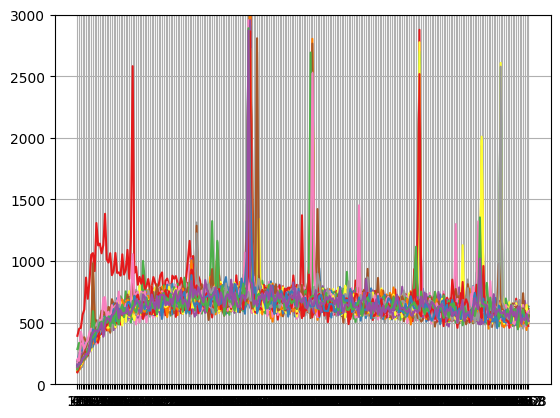

In [60]:
myvs.show_multiple_fig_one_graph(x,df_saikousei_PCA_normal[(df_saikousei_PCA_normal>2500).any(axis=1)].values.tolist(),xlim=3000,legend=False)

In [78]:
df_saikousei_PCA_abnormal = df_train[df_train.index.isin(J_PCA_List[J_PCA_List[0]>200].index)]
List_saikousei_PCA_abnormal = df_saikousei_PCA_abnormal.values.tolist()

In [79]:
len(List_saikousei_PCA_abnormal)

6299

In [86]:
len(df_saikousei_PCA_abnormal[(df_saikousei_PCA_abnormal<1500).all(axis=1)])

67

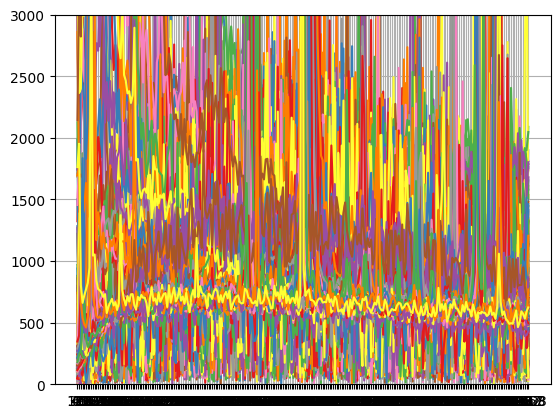

In [80]:
myvs.show_multiple_fig_one_graph(x,List_saikousei_PCA_abnormal[::6],xlim=3000,legend=False)

## Kmeans

In [88]:
import numpy as np
def J_Kmeans(k,X_train,X_test=False):
    np_test = np.array(X_test)
    if X_test == False:
        X_test = X_train
    miniKM = MiniBatchKMeans(n_clusters=k,random_state=0)
    miniKM.fit(X_train)
    centers = miniKM.cluster_centers_
    clusters = miniKM.predict(X_test)
    cluster_centers = np.array([centers[i] for i in clusters])
    gosa_vectors =  cluster_centers-np_test
    gosas = np.sqrt(np.sum(gosa_vectors**2,axis=1))
    return gosas


In [92]:
J_Kmeans_List = []
for k in range(1,9):
    J_Kmeans_List.append(J_Kmeans(k,List_saikousei_train_std))

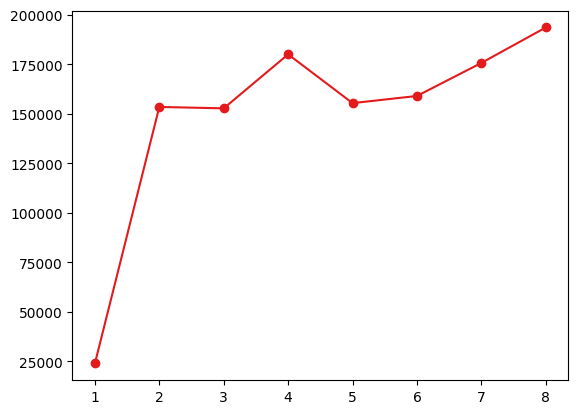

In [93]:
fig,ax = plt.subplots()
J_Kmeans_List = np.array(J_Kmeans_List)
ax.plot(range(1,9),J_Kmeans_List.sum(axis=1))
ax.scatter(range(1,9),J_Kmeans_List.sum(axis=1))

In [94]:
k=2

In [99]:
J_KMeans_List=J_Kmeans(k,List_saikousei_train_std,List_saikousei_test_std)
J_KMeans_List = pd.DataFrame(J_KMeans_List)
J_KMeans_List.index = df_saikousei_test.index
J_KMeans_List

0
0       10.284145
2       10.268362
5       10.498433
7       40.055278
10      10.825677
...           ...
104434   4.872807
104435  10.814917
104437   3.930060
104441   4.319626
104443   4.964911

[52222 rows x 1 columns]

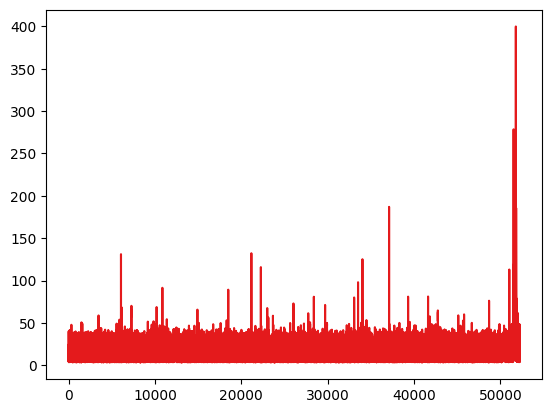

In [100]:
fig,ax = plt.subplots()

ax.plot(range(len(J_KMeans_List)),J_KMeans_List)

(array([0.000e+00, 0.000e+00, 0.000e+00, 2.083e+03, 7.560e+03, 2.774e+03,
        1.480e+03, 9.920e+02, 7.240e+02, 8.500e+02, 6.280e+03, 1.447e+04,
        5.852e+03, 1.654e+03, 1.069e+03, 6.910e+02, 4.860e+02, 4.890e+02,
        3.960e+02, 2.790e+02, 2.350e+02, 1.790e+02, 1.530e+02, 2.060e+02,
        2.700e+02, 2.120e+02, 2.020e+02, 1.510e+02, 1.550e+02, 1.640e+02,
        1.860e+02, 1.370e+02, 1.280e+02, 1.720e+02, 1.650e+02, 2.040e+02,
        2.310e+02, 1.980e+02, 1.040e+02, 1.150e+02, 7.500e+01, 5.900e+01,
        4.200e+01, 3.900e+01, 2.100e+01, 1.700e+01, 1.900e+01, 1.600e+01,
        6.600e+01, 1.100e+01, 5.000e+00, 6.000e+00, 3.000e+00, 5.000e+00,
        1.000e+01, 8.000e+00, 1.100e+01, 9.000e+00, 1.500e+01, 8.000e+00,
        5.000e+00, 8.000e+00, 7.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+0

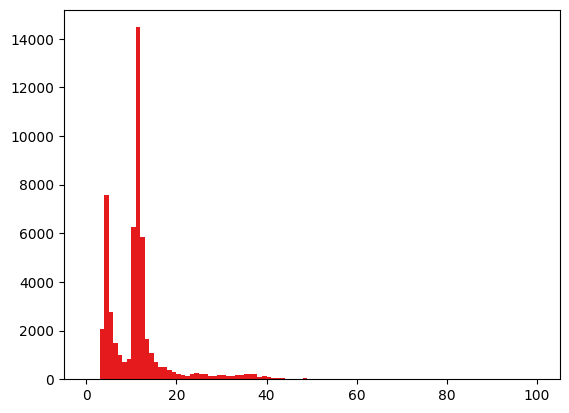

In [102]:
fig,ax = plt.subplots()

ax.hist(J_KMeans_List,bins=100,range=[0,100])

In [112]:
df_saikousei_KMeans_normal = df_train[df_train.index.isin(J_KMeans_List[J_KMeans_List[0]<15].index)]
List_saikousei_KMeans_normal = df_saikousei_KMeans_normal.values.tolist()

In [113]:
len(List_saikousei_KMeans_normal)

45788

In [114]:
len(df_saikousei_KMeans_normal[(df_saikousei_KMeans_normal>2500).any(axis=1)])

3013

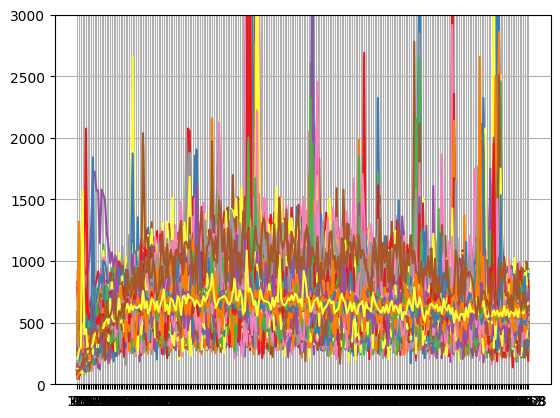

In [115]:
myvs.show_multiple_fig_one_graph(x,List_saikousei_KMeans_normal[::51],xlim=3000,legend=False)

In [116]:
from sklearn.svm import OneClassSVM

In [117]:
ocsvm = OneClassSVM()

In [ ]:
ocsvm.fit(List_saikousei_train_std)

In [ ]:
df_unsu_ocsvm_result = ocsvm.predict(List)

In [ ]:
df_unsu_ocsvm_result = pd.DataFrame(df_unsu_ocsvm_result)
df_unsu_ocsvm_result.index = df_test.index
df_unsu_ocsvm_result

In [ ]:
df_unsp_ocsvm_normal = df_train[df_train.index.isin(df_unsu_ocsvm_result[df_unsu_ocsvm_result[0]==1].index)]
List_unsp_ocsvm_normal = df_unsp_ocsvm_normal.values.tolist()

In [ ]:
len(List_unsp_ocsvm_normal)

In [ ]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_ocsvm_normal[::30],D_df_limfreq.values.tolist())